## Mappings for the dbGaP asthma data
This notebook demonstrates the value of the dbGaP machine readable schema to a data scientist working with diverse data.

#### ToDo
Show merge of two tables/dataframes with different coding

In [22]:
from fasp.search import DataConnectClient
cl = DataConnectClient('http://localhost:8089/')
#cl.listTables(verbose=True)

This lists the schema for one of the dbGaP asthma studies.

In [23]:
cl.listTableInfo('bigquery.dbgap_synth.TOPMed_WGS_CAMP_Subject_Phenotypes', verbose=True)

_Schema for tablebigquery.dbgap_synth.TOPMed_WGS_CAMP_Subject_Phenotypes_
{
   "name": "bigquery.dbgap_synth.TOPMed_WGS_CAMP_Subject_Phenotypes",
   "data_model": {
      "description": "This subject phenotypes data table includes subject's asthma status, gender, age, race, height, weight, BMI, and smoking status (n=3 variables; ever, current, and former).",
      "$id": "dbgap:pht009836.v2",
      "properties": {
         "gender": {
            "$id": "dbgap:phv00426560.v2",
            "description": "Gender of participant",
            "type": "encoded value",
            "oneOf": [
               {
                  "const": "1",
                  "title": "Male"
               },
               {
                  "const": "2",
                  "title": "Female"
               }
            ]
         },
         "race": {
            "$id": "dbgap:phv00426562.v2",
            "description": "Race of participant",
            "type": "string"
         },
         "SUBJECT_ID": {

### Run a query to show the coded data

In [24]:
df = cl.runQuery('''select SUBJECT_ID, asthma, weight, current_smoker 
                 from bigquery.dbgap_synth.TOPMed_WGS_CAMP_Subject_Phenotypes''', returnType='dataframe')
df



_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________


,SUBJECT_ID,asthma,weight,current_smoker
0,1,1,28.072616,1
1,3,1,26.681969,2
2,20,1,24.024507,1
3,21,1,25.748289,1
4,42,2,24.355659,1
...,...,...,...,...
195,115,1,23.407272,1
196,146,2,22.609817,1
197,150,1,31.932874,1
198,154,1,29.724056,1


### Use the Data Connect provided schema to decode the codes

In [26]:
decode = cl.getDecodeTemplate('bigquery.dbgap_synth.TOPMed_WGS_CAMP_Subject_Phenotypes',
                              ['asthma','current_smoker'])
decode

{'asthma': {0: 'Unknown', 1: 'Asthma case (proband)', 2: 'Control'},
 'current_smoker': {1: 'No', 0: 'Unknown', 2: 'Yes'}}

In [27]:
for col, mapping in decode.items():
    print(f'decoding {mapping.values()}')
    df[col] = df[col].replace(mapping.keys(),mapping.values())
df

decoding dict_values(['Unknown', 'Asthma case (proband)', 'Control'])
decoding dict_values(['No', 'Unknown', 'Yes'])


,SUBJECT_ID,asthma,weight,current_smoker
0,1,Asthma case (proband),28.072616,No
1,3,Asthma case (proband),26.681969,Yes
2,20,Asthma case (proband),24.024507,No
3,21,Asthma case (proband),25.748289,No
4,42,Control,24.355659,No
...,...,...,...,...
195,115,Asthma case (proband),23.407272,No
196,146,Control,22.609817,No
197,150,Asthma case (proband),31.932874,No
198,154,Asthma case (proband),29.724056,No


<AxesSubplot:ylabel='asthma'>

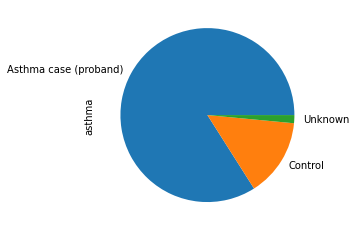

In [20]:
df['asthma'].value_counts().plot.pie()

### Second example of decode

In [25]:
query1 = '''SELECT current_smoker, ever_smoker, count(*) n
FROM bigquery.dbgap_synth.TOPMed_WGS_CAMP_Subject_Phenotypes
group by current_smoker, ever_smoker
'''

res = cl.runQuery(query1, returnType='dataframe')
res

_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________


,current_smoker,ever_smoker,n
0,2,1,23
1,1,1,135
2,1,2,37
3,1,0,3
4,2,2,2


In [26]:
decode2 = cl.getDecodeTemplate('bigquery.dbgap_synth.TOPMed_WGS_CAMP_Subject_Phenotypes',
                              ['current_smoker','ever_smoker'])
decode2

{'current_smoker': {1: 'No', 0: 'Unknown', 2: 'Yes'},
 'ever_smoker': {1: 'No', 0: 'Unknown', 2: 'Yes'}}

In [27]:
for col, mapping in decode2.items():
    res[col] = res[col].replace(mapping.keys(),mapping.values())
res

,current_smoker,ever_smoker,n
0,Yes,No,23
1,No,No,135
2,No,Yes,37
3,No,Unknown,3
4,Yes,Yes,2


### Important point
A data user gets significant value out of the machine readable data dictionary.

### Another asthma dataset - WGS BAGS
See the dataset listing to learn this is the Barbados Asthma study

In [9]:
cl.listTableInfo('bigquery.dbgap_synth.TOPMed_WGS_BAGS_Subject_Phenotypes', verbose=True)

_Schema for tablebigquery.dbgap_synth.TOPMed_WGS_BAGS_Subject_Phenotypes_
{
   "name": "bigquery.dbgap_synth.TOPMed_WGS_BAGS_Subject_Phenotypes",
   "data_model": {
      "description": "This subject phenotype table includes age, sex, and affection status for asthma. Additional variables have been added: smoking status (n=9 variables; includes mother and father smoking status), asthma age of onset, allergic rhinitis, weight, height, IgE measurements (n=3 variables), phadiatop measurements, spirometry measurements (n=3 variables), bronchodilator pills/inhalers/nebulizer (n=6 variables), steroid pills/inhalers (n=4 variables), and cromolyn inhalers (n=2 variables).",
      "$id": "dbgap:pht005905.v3",
      "properties": {
         "AGE_START_SMOKING": {
            "$id": "dbgap:phv00375340.v1",
            "description": "Answer to \"At what age did you start smoking?\"",
            "type": "integer, encoded value",
            "$unit": "years",
            "oneOf": [
               {

In [10]:

query1 = '''SELECT AFFECTION_STATUS, FEV1_FVC, FVC_PREBD, RAW_PHADIATOP_PAU_L
FROM bigquery.dbgap_synth.TOPMed_WGS_BAGS_Subject_Phenotypes
where FVC_PREBD < 2.2
'''

res = cl.runQuery(query1, returnType='dataframe')
res

_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________


,AFFECTION_STATUS,FEV1_FVC,FVC_PREBD,RAW_PHADIATOP_PAU_L
0,2,None,1.920412,NA
1,2,None,2.165323,<0.1
2,0,None,2.152361,NA
3,1,None,2.105422,NA


### Childhood Asthma Management Project
An example where a semantic codes could be added

In [6]:
table_name = 'bigquery.dbgap_synth.CAMP_CData'
cl.listTableInfo(table_name,verbose=True)

_Schema for tablebigquery.dbgap_synth.CAMP_CData_
{
   "name": "bigquery.dbgap_synth.CAMP_CData",
   "data_model": {
      "$id": "dbgap:pht000700.v1",
      "properties": {
         "bmiz_baseline": {
            "$id": "dbgap:phv00070943.v1",
            "description": "Baseline BMIZ",
            "type": "decimal"
         },
         "pred_bursts_event1_month": {
            "$id": "dbgap:phv00070958.v1",
            "description": "Number of months from Baseline to first prednisone burst.  With the exception of a visit at 2 months, vists are four months apart.  At each visit a participant answers whether prednisone was used since the previous visit.  If prednisone had been used, the value of this variable is the number of months that the visit is from Baseline.  For example, if the first burst was used between the four month and the eight month visit, the pred_bursts_event1_month variable has a value of eight assigned.",
            "type": "integer",
            "$unit": "month"


In [7]:
query1 = '''SELECT tx_grp, count(*) subject_count
FROM bigquery.dbgap_synth.CAMP_CData
group by tx_grp
'''

res = cl.runQuery(query1, returnType='dataframe')
res

_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________
____Page9_______________
____Page10_______________


,tx_grp,subject_count
0,9,355
1,8,254
2,4,281


### Decode the treatment group

In [8]:
tx_decode = cl.getDecodeTemplate(table_name,
                              ['tx_grp'])
tx_decode

{'tx_grp': {1: 'Albuterol',
  2: 'Azithromycin',
  3: 'Beclomethasone',
  4: 'Budesonide',
  5: 'Flunisolide',
  6: 'Fluticasone',
  7: 'Montelukast',
  8: 'Nedocromil',
  9: 'Placebo',
  10: 'Placebo+Triamcinolone',
  11: 'Prednisone+Budesonide+Zafirlukast',
  12: 'Salmeterol',
  13: 'Salmeterol/Fluticasone Combination',
  14: 'Salmeterol+Triamcinolone',
  15: 'Triamcinolone',
  16: 'Zafirlukast'}}

In [10]:
tx_decode = {1: 'Albuterol',
  2: 'Azithromycin',
  3: 'Beclomethasone',
  4: 'Budesonide',
  5: 'Flunisolide',
  6: 'Fluticasone',
  7: 'Montelukast',
  8: 'Nedocromil',
  9: 'Placebo',
  10: 'Placebo+Triamcinolone',
  11: 'Prednisone+Budesonide+Zafirlukast',
  12: 'Salmeterol',
  13: 'Salmeterol/Fluticasone Combination',
  14: 'Salmeterol+Triamcinolone',
  15: 'Triamcinolone',
  16: 'Zafirlukast'}

res['tx_grp'] = res['tx_grp'].replace(tx_decode.keys(),tx_decode.values())
res

,tx_grp,subject_count
0,Placebo,355
1,Nedocromil,254
2,Budesonide,281


### Creating your own mapping from the template

In [28]:
my_decode = {'tx_grp': {'1': 'C0001927',
  '2': 'C0052796',
  '3': 'C0004905',
  '4': 'C0794777',
  '5': 'Flunisolide',
  '6': 'Fluticasone',
  '7': 'Montelukast',
  '8': '1157529',
  '9': 'Placebo',
  '10': 'Placebo+Triamcinolone',
  '11': 'Prednisone+Budesonide+Zafirlukast',
  '12': 'Salmeterol',
  '13': 'Salmeterol/Fluticasone Combination',
  '14': 'Salmeterol+Triamcinolone',
  '15': 'Triamcinolone',
  '16': 'Zafirlukast'}}

### Saved mappings

In [11]:
%env GOOGLE_APPLICATION_CREDENTIALS=/home/user/gcp_project-0000000000.json

env: GOOGLE_APPLICATION_CREDENTIALS=/home/user/gcp_project-0000000000.json


In [3]:
from fasp.search import MappingLibraryClient

mcl = MappingLibraryClient()
mcl.getMappingsForVar('phv00159572.v4', returnType='dataframe')

,map_id,map_type,to_scheme,to_vocab_id
0,1080,terms,CDISC Race,2000


In [18]:
mcl.getMappingsForVar('dbgap:phv00426568.v2', returnType='dataframe')


,map_id,map_type,to_scheme,to_vocab_id
0,10005,json_map,decoded4,
1,10000,json_map,decoded,
2,10010,json_map,decoded,


In [4]:
import json
json_map = {1: 'No', 0: 'Unknown', 2: 'Yes'}
mcl.addJsonMap('10010', 'dbgap:phv00426568.v2', 'decoded', '', json_map)

In [5]:
current_smoker_decode = mcl.getJsonMap('10010')
current_smoker_decode

{1: 'No', 0: 'Unknown', 2: 'Yes'}

In [6]:
json_map = {0: 'Unknown', 1: 'Asthma case (proband)', 2: 'Control'}
mcl.addJsonMap('10020', 'dbgap:phv00493726.v1', 'decoded', '', json_map)

In [7]:
asthma_decode = mcl.getJsonMap(10020)
asthma_decode

{0: 'Unknown', 1: 'Asthma case (proband)', 2: 'Control'}

In [9]:
df = cl.runQuery('''select SUBJECT_ID, asthma, weight, current_smoker 
                 from bigquery.dbgap_synth.TOPMed_WGS_CAMP_Subject_Phenotypes''', returnType='dataframe')
df

_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
____Page7_______________
____Page8_______________


,SUBJECT_ID,asthma,weight,current_smoker
0,1,1,28.072616,1
1,3,1,26.681969,2
2,20,1,24.024507,1
3,21,1,25.748289,1
4,42,2,24.355659,1
...,...,...,...,...
195,115,1,23.407272,1
196,146,2,22.609817,1
197,150,1,31.932874,1
198,154,1,29.724056,1


In [11]:
df['asthma'] = df['asthma'].replace(asthma_decode.keys(),asthma_decode.values())
df['current_smoker'] = df['current_smoker'].replace(current_smoker_decode.keys(),current_smoker_decode.values())
df

,SUBJECT_ID,asthma,weight,current_smoker
0,1,Asthma case (proband),28.072616,No
1,3,Asthma case (proband),26.681969,Yes
2,20,Asthma case (proband),24.024507,No
3,21,Asthma case (proband),25.748289,No
4,42,Control,24.355659,No
...,...,...,...,...
195,115,Asthma case (proband),23.407272,No
196,146,Control,22.609817,No
197,150,Asthma case (proband),31.932874,No
198,154,Asthma case (proband),29.724056,No


### Modifying a mapping

In [16]:
json_map = {0: 'Unknown', 1: 'Case', 2: 'Control'}
mcl.addJsonMap('10021', 'dbgap:phv00493726.v1', 'standardizedCaseControl', '', json_map)

In [17]:
mcl.getMappingsForVar('dbgap:phv00493726.v1', returnType='dataframe')

,map_id,map_type,to_scheme,to_vocab_id
0,10020,json_map,decoded,
1,10002,json_map,standardizedCaseControl,
2,10021,json_map,standardizedCaseControl,
3,10002,json_map,standardizedCaseControl,


In [14]:
mcl.getJsonMap(10002)

{0: 'Unknown', 1: 'Case', 2: 'Control'}

### Creating a mapping to a terminology

How would the above look if we were to map to a terminology in some system

json_map = {0: 'C123456', 1: 'C123457', 2: 'C123458'}
mcl.addJsonMap('10022', 'dbgap:phv00493726.v1', 'NCIT Terms', '', json_map)

The question would be finding the right terms
Looking for Case we find ""
That's not really the sense we're looking for. Here Case means 
What helps more is a CDE that says column is indicating case or control status in a case-control study.